In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1. Age

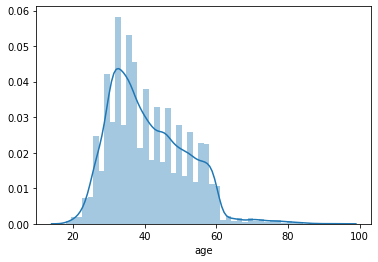

In [4]:
sns.distplot((df['age']))

In [5]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

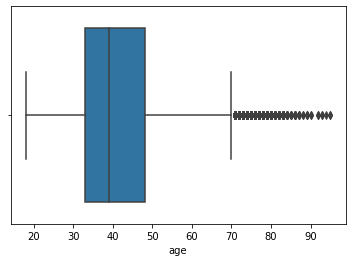

In [6]:
sns.boxplot(df['age'])

# 2. Job

In [7]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

## I will convert this feature into employed,unemployed,unknown

In [8]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df['job']=df['job'].map({'management':'employed', 'technician':'employed', 'entrepreneur':'employed', 'blue-collar':'employed',
       'unknown':'unknown', 'retired':'unemployed', 'admin.':'employed', 'services':'employed', 'self-employed':'employed',
       'unemployed':'unemployed', 'housemaid':'employed', 'student':'unemployed'})

In [10]:
df['job'].value_counts()

employed      40418
unemployed     4505
unknown         288
Name: job, dtype: int64

In [11]:
## getting dummies


In [12]:
job_dummies = pd.get_dummies(df['job'],drop_first=True)
job_dummies.columns =['unemployed','unknown_employment']
df = pd.concat([df,job_dummies],axis=1)
df=df.drop('job',axis=1)

In [13]:
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


# 3. Marital

In [14]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [15]:
#### I will convert it into single and married

In [16]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [17]:
df['marital']=df['marital'].map({'married':'married', 'single':'single', 'divorced':'single'})

In [18]:
marital_dummies = pd.get_dummies(df['marital'],drop_first=True)

df = pd.concat([df,marital_dummies],axis=1)
df=df.drop('marital',axis=1)

In [19]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0
1,44,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0,0
3,47,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0
4,33,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1,1


## 4. Education

In [20]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [21]:
df['education'].replace("unknown","secondary")

0         tertiary
1        secondary
2        secondary
3        secondary
4        secondary
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [22]:
len(df[df['education']=='unknown'])/len(df)

0.04107407489327818

In [23]:
df['education']=df['education'].replace("unknown",np.nan)

In [24]:
df.dropna(subset=['education'],inplace=True)

In [25]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [26]:
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [27]:
df['education']=df['education'].map({'tertiary':int(3), 'secondary':int(2), 'primary':int(1)})

In [28]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single
0,58,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0
1,44,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1
2,33,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0,0
5,35,3,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,0,0
6,28,3,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,0,1


# 5. default

In [29]:
df['default'].value_counts()

no     42571
yes      783
Name: default, dtype: int64

In [30]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
default_dummies = pd.get_dummies(df['default'],drop_first=True)
default_dummies.columns = ['Default']

df = pd.concat([df,default_dummies],axis=1)
df=df.drop('default',axis=1)

In [32]:
df.head()

,age,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default
0,58,3,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0
1,44,2,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1,0
2,33,2,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0,0,0
5,35,3,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,0,0,0
6,28,3,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,0,1,0


# 6. balance

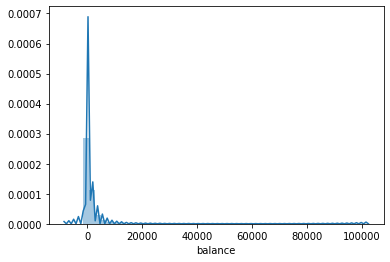

In [33]:
sns.distplot(df['balance'])

In [34]:
df['balance'].describe()

count     43354.000000
mean       1355.226715
std        3039.916830
min       -8019.000000
25%          71.000000
50%         443.000000
75%        1415.000000
max      102127.000000
Name: balance, dtype: float64

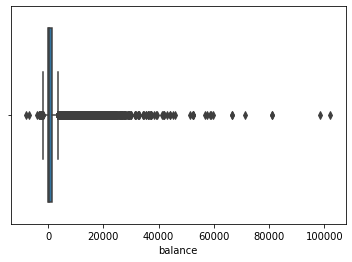

In [35]:
sns.boxplot(df['balance'])

In [36]:
df[df['balance']>20000].count()

age                   188
education             188
balance               188
housing               188
loan                  188
contact               188
day                   188
month                 188
duration              188
campaign              188
pdays                 188
previous              188
poutcome              188
y                     188
unemployed            188
unknown_employment    188
single                188
Default               188
dtype: int64

# 7. housing

In [37]:
df['housing'].value_counts()

yes    24310
no     19044
Name: housing, dtype: int64

In [38]:
housing_dummies = pd.get_dummies(df['housing'],drop_first=True)
housing_dummies.columns = ['Housing']

df = pd.concat([df,housing_dummies],axis=1)
df=df.drop('housing',axis=1)

In [39]:
df.head()

,age,education,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default,Housing
0,58,3,2143,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,1
1,44,2,29,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1,0,1
2,33,2,2,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0,0,0,1
5,35,3,231,no,unknown,5,may,139,1,-1,0,unknown,no,0,0,0,0,1
6,28,3,447,yes,unknown,5,may,217,1,-1,0,unknown,no,0,0,1,0,1


# 8. Loan 

In [40]:
df['loan'].value_counts()

no     36243
yes     7111
Name: loan, dtype: int64

In [41]:
loan_dummies = pd.get_dummies(df['loan'],drop_first=True)
loan_dummies.columns = ['Loan']

df = pd.concat([df,loan_dummies],axis=1)
df=df.drop('loan',axis=1)

In [42]:
df.head()

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default,Housing,Loan
0,58,3,2143,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,1,0
1,44,2,29,unknown,5,may,151,1,-1,0,unknown,no,0,0,1,0,1,0
2,33,2,2,unknown,5,may,76,1,-1,0,unknown,no,0,0,0,0,1,1
5,35,3,231,unknown,5,may,139,1,-1,0,unknown,no,0,0,0,0,1,0
6,28,3,447,unknown,5,may,217,1,-1,0,unknown,no,0,0,1,0,1,1


# 9.Contact

In [43]:
df['contact'].value_counts()

cellular     28295
unknown      12343
telephone     2716
Name: contact, dtype: int64

In [44]:
df['contact'] = df['contact'].map({'cellular':'call','telephone':'call','unknown':'unknown'})

In [45]:
df['contact'].value_counts()

call       31011
unknown    12343
Name: contact, dtype: int64

In [46]:
contact_dummies = pd.get_dummies(df['contact'],drop_first=True)
contact_dummies.columns = ['Called']

df = pd.concat([df,contact_dummies],axis=1)
df=df.drop('contact',axis=1)

In [47]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default,Housing,Loan,Called
0,58,3,2143,5,may,261,1,-1,0,unknown,no,0,0,0,0,1,0,1
1,44,2,29,5,may,151,1,-1,0,unknown,no,0,0,1,0,1,0,1
2,33,2,2,5,may,76,1,-1,0,unknown,no,0,0,0,0,1,1,1
5,35,3,231,5,may,139,1,-1,0,unknown,no,0,0,0,0,1,0,1
6,28,3,447,5,may,217,1,-1,0,unknown,no,0,0,1,0,1,1,1


# 10. day

In [48]:
df['day'].value_counts()

20    2639
18    2233
21    1968
17    1877
6     1830
5     1802
14    1786
8     1766
7     1751
28    1747
19    1670
29    1667
15    1651
12    1548
13    1532
9     1488
30    1484
11    1407
4     1379
16    1333
2     1247
27    1077
3     1044
26    1001
23     900
22     878
25     814
31     597
10     506
24     426
1      306
Name: day, dtype: int64

In [49]:
df['days_since_contacted'] = 31 - df['day']

In [50]:
df['days_since_contacted']

0        26
1        26
2        26
5        26
6        26
         ..
45206    14
45207    14
45208    14
45209    14
45210    14
Name: days_since_contacted, Length: 43354, dtype: int64

# 11. month

In [51]:
df['month'].value_counts()

may    13210
jul     6621
aug     6070
jun     5026
nov     3851
apr     2822
feb     2543
jan     1327
oct      696
sep      537
mar      451
dec      200
Name: month, dtype: int64

In [52]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [53]:
df['month']=df['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})

In [54]:
df['months_last_contacted'] = 12 - df['month']

In [55]:
df['months_last_contacted']

0        7
1        7
2        7
5        7
6        7
        ..
45206    1
45207    1
45208    1
45209    1
45210    1
Name: months_last_contacted, Length: 43354, dtype: int64

# 12. Duration

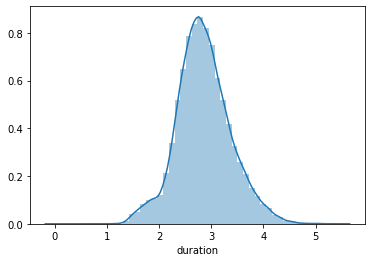

In [56]:
sns.distplot((df['duration'])**(1/5)) ##Box-Cox Transformation

In [57]:
df['duration'].describe()

count    43354.000000
mean       258.199451
std        258.028124
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

In [58]:
df[df['duration']>3000]

,age,education,balance,day,month,duration,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default,Housing,Loan,Called,days_since_contacted,months_last_contacted
2386,45,2,66,13,5,3366,3,-1,0,unknown,no,0,0,0,0,1,0,1,18,7
4382,34,1,183,19,5,3078,4,-1,0,unknown,no,0,0,0,0,1,0,1,12,7
6451,44,2,51,27,5,3094,2,-1,0,unknown,yes,0,0,1,0,1,1,1,4,7
9947,59,2,1321,9,6,3881,3,-1,0,unknown,yes,0,0,0,0,0,0,1,22,6
12347,28,2,-7,26,6,3183,2,-1,0,unknown,yes,0,0,1,0,0,1,1,5,6
19639,37,3,359,7,8,3422,2,-1,0,unknown,no,0,0,0,0,0,1,0,24,4
21113,43,3,423,14,8,3322,2,-1,0,unknown,no,0,0,0,0,0,0,0,17,4
24044,36,3,-103,17,10,3253,1,-1,0,unknown,yes,0,0,1,0,1,1,0,14,2
24095,30,2,1310,27,10,3284,1,-1,0,unknown,no,0,0,0,0,0,0,0,4,2
24148,59,3,6573,10,11,4918,1,-1,0,unknown,no,0,0,0,0,1,0,0,21,1


In [59]:
df['box_cox_duration'] = df['duration']**(1/5)

In [60]:
df['box_cox_duration']

0        3.043183
1        2.727692
2        2.377731
5        2.682891
6        2.932864
           ...   
45206    3.962588
45207    3.402460
45208    4.077414
45209    3.476744
45210    3.247143
Name: box_cox_duration, Length: 43354, dtype: float64

In [61]:
df=df.drop('duration',axis=1)

In [62]:
df.head()

,age,education,balance,day,month,campaign,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default,Housing,Loan,Called,days_since_contacted,months_last_contacted,box_cox_duration
0,58,3,2143,5,5,1,-1,0,unknown,no,0,0,0,0,1,0,1,26,7,3.043183
1,44,2,29,5,5,1,-1,0,unknown,no,0,0,1,0,1,0,1,26,7,2.727692
2,33,2,2,5,5,1,-1,0,unknown,no,0,0,0,0,1,1,1,26,7,2.377731
5,35,3,231,5,5,1,-1,0,unknown,no,0,0,0,0,1,0,1,26,7,2.682891
6,28,3,447,5,5,1,-1,0,unknown,no,0,0,1,0,1,1,1,26,7,2.932864


# 13. campaign

In [63]:
df['campaign'].value_counts()

1     16795
2     11984
3      5296
4      3409
5      1711
6      1239
7       699
8       519
9       312
10      256
11      190
12      150
13      125
14       86
15       83
16       76
17       65
18       47
19       43
20       42
21       34
25       22
24       20
23       20
22       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
35        3
38        3
50        2
43        2
41        2
46        1
37        1
51        1
55        1
58        1
39        1
44        1
Name: campaign, dtype: int64

In [64]:
data=df.copy()

In [65]:
data['campaign'] = np.where(data['campaign']<15,"Low","High")

In [66]:
data['campaign'].value_counts()

Low     42771
High      583
Name: campaign, dtype: int64

In [67]:
df['campaign'] = np.where(df['campaign']<15,"Low","High")

In [68]:
campaign_dummies = pd.get_dummies(df['campaign'],drop_first=True)
campaign_dummies.columns = ['Contact_campaign']

df = pd.concat([df,campaign_dummies],axis=1)
df=df.drop('campaign',axis=1)

In [69]:
df.head()

,age,education,balance,day,month,pdays,previous,poutcome,y,unemployed,unknown_employment,single,Default,Housing,Loan,Called,days_since_contacted,months_last_contacted,box_cox_duration,Contact_campaign
0,58,3,2143,5,5,-1,0,unknown,no,0,0,0,0,1,0,1,26,7,3.043183,1
1,44,2,29,5,5,-1,0,unknown,no,0,0,1,0,1,0,1,26,7,2.727692,1
2,33,2,2,5,5,-1,0,unknown,no,0,0,0,0,1,1,1,26,7,2.377731,1
5,35,3,231,5,5,-1,0,unknown,no,0,0,0,0,1,0,1,26,7,2.682891,1
6,28,3,447,5,5,-1,0,unknown,no,0,0,1,0,1,1,1,26,7,2.932864,1


# 14. pdays

In [70]:
df['pdays'].value_counts()

-1      35420
 182      152
 92       138
 183      120
 91       118
        ...  
 717        1
 589        1
 493        1
 45         1
 32         1
Name: pdays, Length: 557, dtype: int64

In [71]:
df['pdays']=df['pdays'].replace(-1,0)

In [72]:
df['pdays'].describe()

count    43354.000000
mean        41.157955
std         99.995492
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: pdays, dtype: float64

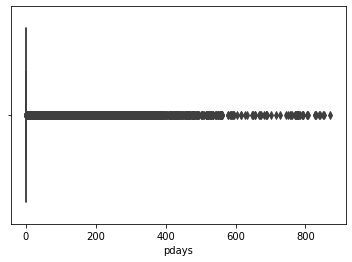

In [73]:
sns.boxplot(df['pdays'])

In [74]:
df['pdays'] =np.where(df['pdays']==0,0,1)

In [75]:
df['pdays'].value_counts()

0    35420
1     7934
Name: pdays, dtype: int64

# 15. previous

In [76]:
df['previous'].value_counts()

0      35420
1       2656
2       2011
3       1098
4        695
5        446
6        269
7        197
8        127
9         88
10        63
11        60
12        42
13        36
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         4
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [77]:
df['previous'] = np.where(df['previous']==0,0,1)

In [78]:
df['previous'].value_counts()

0    35420
1     7934
Name: previous, dtype: int64

# 16.poutcome

In [79]:
df['poutcome'].value_counts()

unknown    35425
failure     4724
other       1775
success     1430
Name: poutcome, dtype: int64

In [80]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [81]:
df['poutcome']=df['poutcome'].replace('other','failure')

In [82]:
df['poutcome'].value_counts()

unknown    35425
failure     6499
success     1430
Name: poutcome, dtype: int64

In [83]:
pout_dummies = pd.get_dummies(df['poutcome'],drop_first=True)
pout_dummies.columns = ['Previous_outcome_1','Previous_outcome_2']

df = pd.concat([df,pout_dummies],axis=1)
df=df.drop('poutcome',axis=1)

In [84]:
df.head()

,age,education,balance,day,month,pdays,previous,y,unemployed,unknown_employment,...,Default,Housing,Loan,Called,days_since_contacted,months_last_contacted,box_cox_duration,Contact_campaign,Previous_outcome_1,Previous_outcome_2
0,58,3,2143,5,5,0,0,no,0,0,...,0,1,0,1,26,7,3.043183,1,0,1
1,44,2,29,5,5,0,0,no,0,0,...,0,1,0,1,26,7,2.727692,1,0,1
2,33,2,2,5,5,0,0,no,0,0,...,0,1,1,1,26,7,2.377731,1,0,1
5,35,3,231,5,5,0,0,no,0,0,...,0,1,0,1,26,7,2.682891,1,0,1
6,28,3,447,5,5,0,0,no,0,0,...,0,1,1,1,26,7,2.932864,1,0,1


In [85]:
## Revisit balance

In [87]:
df['balance'].describe() , df['balance'].median()

(count     43354.000000
 mean       1355.226715
 std        3039.916830
 min       -8019.000000
 25%          71.000000
 50%         443.000000
 75%        1415.000000
 max      102127.000000
 Name: balance, dtype: float64,
 443.0)

In [89]:
df['balance'] = np.where(df['balance'] > df['balance'].mean(),1,0)

In [90]:
df['balance'].value_counts()

0    32103
1    11251
Name: balance, dtype: int64

In [91]:
df['age'].describe()

count    43354.000000
mean        40.783111
std         10.518987
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [92]:
df['age'].median()

39.0

In [93]:
df['age'] = np.where(df['age'] <39,"young","old")

In [94]:
df['age'].value_counts()

old      22094
young    21260
Name: age, dtype: int64

In [95]:
age_dummies = pd.get_dummies(df['age'],drop_first=True)
age_dummies.columns = ['Age']

df = pd.concat([df,age_dummies],axis=1)
df=df.drop('age',axis=1)

In [96]:
df.head()

,education,balance,day,month,pdays,previous,y,unemployed,unknown_employment,single,...,Housing,Loan,Called,days_since_contacted,months_last_contacted,box_cox_duration,Contact_campaign,Previous_outcome_1,Previous_outcome_2,Age
0,3,1,5,5,0,0,no,0,0,0,...,1,0,1,26,7,3.043183,1,0,1,0
1,2,0,5,5,0,0,no,0,0,1,...,1,0,1,26,7,2.727692,1,0,1,0
2,2,0,5,5,0,0,no,0,0,0,...,1,1,1,26,7,2.377731,1,0,1,1
5,3,0,5,5,0,0,no,0,0,0,...,1,0,1,26,7,2.682891,1,0,1,1
6,3,0,5,5,0,0,no,0,0,1,...,1,1,1,26,7,2.932864,1,0,1,1


In [97]:
df['y'].value_counts()

no     38317
yes     5037
Name: y, dtype: int64

In [98]:
df['y'] = df['y'].map({'no':0,'yes':1})

In [99]:
df.to_csv('Feature_Engg.csv')